In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Data 1

In [2]:
# Read in
df1 = pd.read_csv('../data/df1.csv')

In [3]:
# Inspect
df1.head()

,x,y
0,3.824188,2.061158
1,3.479966,2.644357
2,4.173468,3.748112
3,3.909048,4.161936
4,2.428279,3.603281


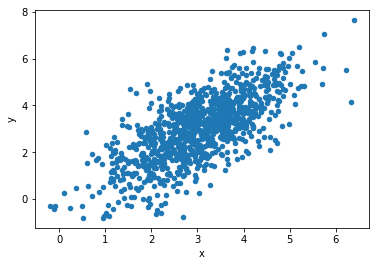

In [4]:
# Plot
df1.plot('x', 'y', kind='scatter')

In [5]:
# Fit a simple model
model1 = smf.ols(
    formula='y ~ x',
    data=df1
)
model1_fit = model1.fit()

In [6]:
# Summarize
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1017.
Date:                Mon, 11 May 2020   Prob (F-statistic):          2.12e-154
Time:                        23:42:16   Log-Likelihood:                -1395.1
No. Observations:                1000   AIC:                             2794.
Df Residuals:                     998   BIC:                             2804.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0309      0.097      0.318      0.751      -0.160       0.221
x              0.9811      0.031     31.884      0.000       0.921       1.041
==============================================================================
Omnibus:                        2.145   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                2.001
Skew:                          -0.093   Prob(JB):                        0.368
Kurtosis:                       3.114   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

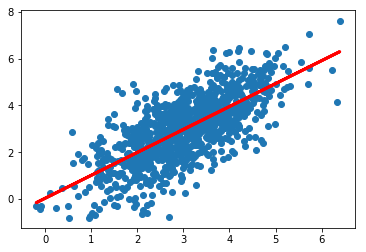

In [7]:
# Plot regression line over points
plt.scatter(df1['x'], df1['y'])
plt.plot(df1['x'], model1_fit.predict(df1), color='red', linewidth=3)
plt.show()

##### How do we know the model is doing a reasonable and good job?  What about if our data satisfies the assumptions of OLS?

If you aren't sure and don't have a good reference, this page usually refreshes my memory pretty quickly.

https://online.stat.psu.edu/stat504/node/216/

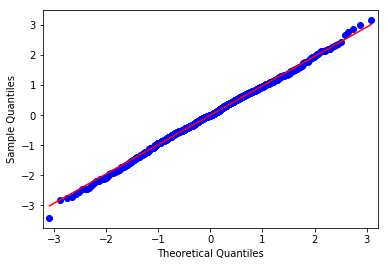

In [8]:
# Let's check one assumption of OLS: Normally distributed errors
residuals = model1_fit.resid
fig = sm.qqplot(residuals, line='s')
plt.show()

# Data 2

In [9]:
# Read in
df2 = pd.read_csv('../data/df2.csv')

In [10]:
# Inspect
df2.head()

,x,y
0,2.206877,2.529905
1,4.028246,3.340645
2,3.288655,2.912197
3,5.205833,2.724151
4,4.435430,3.009394


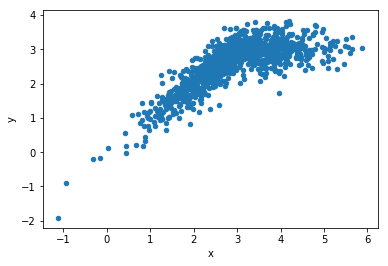

In [11]:
# Plot
df2.plot('x', 'y', kind='scatter')

In [12]:
# Hmm, interesting plot.  Fit a simple model again
model2 = smf.ols(
    formula='y ~ x',
    data=df2
)
model2_fit = model2.fit()

In [13]:
# Summarize
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     1413.
Date:                Mon, 11 May 2020   Prob (F-statistic):          2.34e-193
Time:                        23:42:17   Log-Likelihood:                -610.17
No. Observations:                1000   AIC:                             1224.
Df Residuals:                     998   BIC:                             1234.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0223      0.043     23.550      0.000       0.937       1.107
x              0.5248      0.014     37.590      0.000       0.497       0.552
==============================================================================
Omnibus:                       42.810   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.447
Skew:                          -0.462   Prob(JB):                     1.11e-11
Kurtosis:                       3.599   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

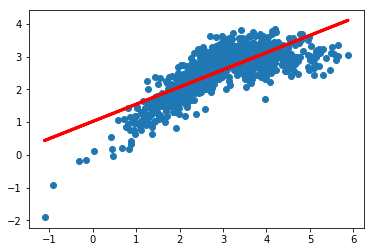

In [14]:
# Plot regression line over points
plt.scatter(df2['x'], df2['y'])
plt.plot(df2['x'], model2_fit.predict(df2), color='red', linewidth=3)
plt.show()

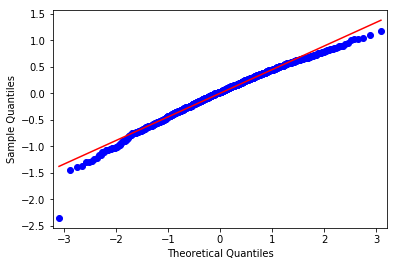

In [15]:
# How does the residual plot look?
residuals = model2_fit.resid
fig = sm.qqplot(residuals, line='s')
plt.show()

Seems to overpredict towards the edges but underpredict towards the middle.

How can we deal with this?

- Non-linear term instead of a linear one (e.g. square root of x)
- Add another variable that models it as an "elbow"

Let's try both

### Sqrt

In [16]:
model2_sqrt = smf.ols(
    formula='y ~ np.sqrt(x)',
    data=df2
)
model2_sqrt_fit = model2_sqrt.fit()

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\statsmodels\base\data.py:480: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if hasattr(x, 'ix'):


In [17]:
# Summarize
model2_sqrt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1709.
Date:                Mon, 11 May 2020   Prob (F-statistic):          3.94e-218
Time:                        23:42:17   Log-Likelihood:                -499.12
No. Observations:                 996   AIC:                             1002.
Df Residuals:                     994   BIC:                             1012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3644      0.072     -5.039      0.000      -0.506      -0.223
np.sqrt(x)     1.7391      0.042     41.337      0.000       1.657       1.822
==============================================================================
Omnibus:                        6.731   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.826
Skew:                          -0.192   Prob(JB):                       0.0329
Kurtosis:                       2.870   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


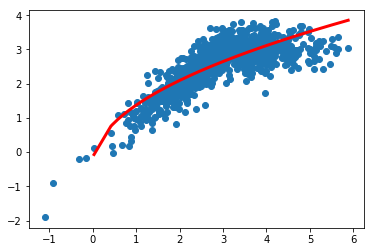

In [18]:
# Plot regression line over points
def sort_df(df, var='x'):
    return df.sort_values(by=[var])[var]

plt.scatter(df2['x'], df2['y'])
plt.plot(sort_df(df2), model2_sqrt_fit.predict(sort_df(df2)), color='red', linewidth=3)
plt.show()

Seems to catch some of it but not quite

### "Elbow" variable

Effectively, we're looking the "cancel" the initial linear effect.  Mathematically, this can happen a few ways.  But within a regression, one way to make it work is to add an interaction term.

It looks like the line flattens around 3, so what if we added an indicator variable to indicate whether or not x is over 3?

In [19]:
def create_x_gte3_ind(x):
    return [1 if a > 3 else 0 for a in x]

In [20]:
# Fit model
model2_gte3ind = smf.ols(
    formula='y ~ x + create_x_gte3_ind(x)',
    data=df2
)
model2_gte3ind_fit = model2_gte3ind.fit()

In [21]:
# Summarize
model2_gte3ind_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     711.9
Date:                Mon, 11 May 2020   Prob (F-statistic):          8.95e-193
Time:                        23:42:17   Log-Likelihood:                -607.65
No. Observations:                1000   AIC:                             1221.
Df Residuals:                     997   BIC:                             1236.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9496      0.054     17.558      0.000       0.843       1.056
x                        0.5660      0.023     24.574      0.000       0.521       0.611
create_x_gte3_ind(x)    -0.1047      0.047     -2.245      0.025      -0.196      -0.013
==============================================================================
Omnibus:                       36.517   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.950
Skew:                          -0.438   Prob(JB):                     1.28e-09
Kurtosis:                       3.466   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

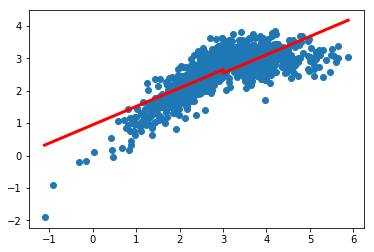

In [22]:
# Plot regression line over points
plt.scatter(df2['x'], df2['y'])
plt.plot(sort_df(df2), model2_gte3ind_fit.predict(sort_df(df2)), color='red', linewidth=3)
plt.show()

It didn't flatten the curve, it actually just added a small "hitch" but kept the slope the same!

Mathematically, this is expected.  The linear regression formula is:

`y_est = 0.9496 + 0.5660 * x - 0.1047 * (x > 3)`

So for values over 3, we are just modifying the intercept term to get:

`y_est = 0.8449 + 0.5560 * x`

Maybe we want the value being "cancelled out" to increase with x, so let's try making the gte3 term also depend on the value of x.  In other words:

`y_est = Intecept + B_1 * x - B_2 * x * (x > 3)`

In [23]:
def create_x_elbow(x):
    return [a if a > 3 else 0 for a in x]

In [24]:
# Fit model
model2_elbow = smf.ols(
    formula='y ~ x + create_x_elbow(x)',
    data=df2
)
model2_elbow_fit = model2_elbow.fit()

In [25]:
# Summarize
model2_elbow_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     804.6
Date:                Mon, 11 May 2020   Prob (F-statistic):          9.16e-209
Time:                        23:42:17   Log-Likelihood:                -570.72
No. Observations:                1000   AIC:                             1147.
Df Residuals:                     997   BIC:                             1162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6325      0.060     10.545      0.000       0.515       0.750
x                     0.7321      0.027     27.566      0.000       0.680       0.784
create_x_elbow(x)    -0.1250      0.014     -9.047      0.000      -0.152      -0.098
==============================================================================
Omnibus:                       12.836   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.973
Skew:                          -0.263   Prob(JB):                      0.00152
Kurtosis:                       3.184   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

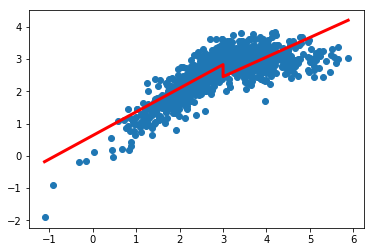

In [26]:
# Plot regression line over points
plt.scatter(df2['x'], df2['y'])
plt.plot(sort_df(df2), model2_elbow_fit.predict(sort_df(df2)), color='red', linewidth=3)
plt.show()

#### Interesting, it looks like it just added a bigger "hitch" in predictions.  Let's look at the math again:

```
y_est = Intercept + B_1 * x - B_2 * x * (x > 3)
      = Intercept + (B_1 - B_2 * (x > 3)) * x
```

Hmm, this doesn't help much.  How about instead we reframe it as what we **want** to happen, which is to subtract the *additional* x slope gained after 3 (our elbow point).  In other words, we want the net regression to look like:

```
y_est = Intercept + (slope when x < 3) * x
```

when x < 3 and

```
y_est = Intercept + (slope when x < 3 - additional slope when x < 3) * x
```

when x > 3.

Here's where visualizing our data can really help us.  Since our data looks like it passes the (0,0) and the slope before x < 3 looks like more-or-less 1, we could isolate the "additional slope" part by simply subtracting 3 from x (because 3 is our elbow point).  In other words, if x > 3, plug in the value of x - 3 to determine the additional slope and subtract it.  We're effectively setting the initial slope removed to 0 at x = 3 and increasing the amount removed linearly (and ideally equal to B_1).

Therefore we end up with something like this:

```
y_est = Intercept + B_1 * x - B_2 * (x - 3) * (x > 3)
```

Let's code it up

In [27]:
def create_x_elbow_with_adjustment(x):
    return [a - 3 if a > 3 else 0 for a in x]

In [28]:
# Fit model
model2_elbow_with_adjustment = smf.ols(
    formula='y ~ x + create_x_elbow_with_adjustment(x)',
    data=df2
)
model2_elbow_with_adjustment_fit = model2_elbow_with_adjustment.fit()

In [29]:
# Summarize
model2_elbow_with_adjustment_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1723.
Date:                Mon, 11 May 2020   Prob (F-statistic):          4.94e-324
Time:                        23:42:18   Log-Likelihood:                -304.01
No. Observations:                1000   AIC:                             614.0
Df Residuals:                     997   BIC:                             628.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.0029      0.048     -0.062      0.951      -0.096       0.091
x                                     0.9990      0.019     51.741      0.000       0.961       1.037
create_x_elbow_with_adjustment(x)    -0.9889      0.034    -29.021      0.000      -1.056      -0.922
==============================================================================
Omnibus:                        7.735   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.833
Skew:                          -0.130   Prob(JB):                       0.0121
Kurtosis:                       3.380   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

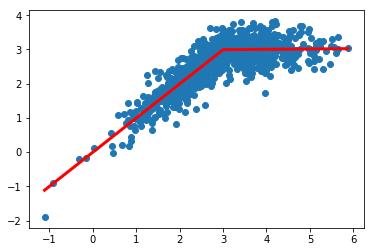

In [30]:
# Plot regression line over points
plt.scatter(df2['x'], df2['y'])
plt.plot(sort_df(df2), model2_elbow_with_adjustment_fit.predict(sort_df(df2)), color='red', linewidth=3)
plt.show()

It's a modern day miracle!

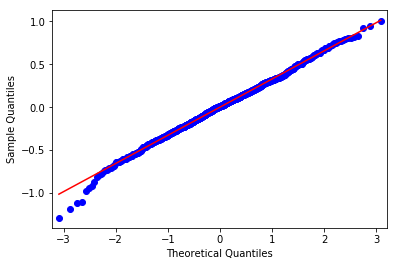

In [31]:
# How does the residual plot look?
residuals = model2_elbow_with_adjustment_fit.resid
fig = sm.qqplot(residuals, line='s')
plt.show()

Things aren't always this simple, so is there a way to figure this out more programatically?

Sure, but it can be overkill to do really hardcore estimation of something like that.  For example, say we wanted to programmatically determine the best 1) elbow point and 2) correction factor to flatten out the curve.  If we operate on the assumption that these should be the same:

In [32]:
def sim_elbow_point(e):
    def create_x_elbow_with_adjustment(x):
        return [a - e if a > e else 0 for a in x]
    
    # Fit model
    model2_elbow_with_adjustment = smf.ols(
        formula='y ~ x + create_x_elbow_with_adjustment(x)',
        data=df2
    )
    model2_elbow_with_adjustment_fit = model2_elbow_with_adjustment.fit()
    
    return model2_elbow_with_adjustment_fit

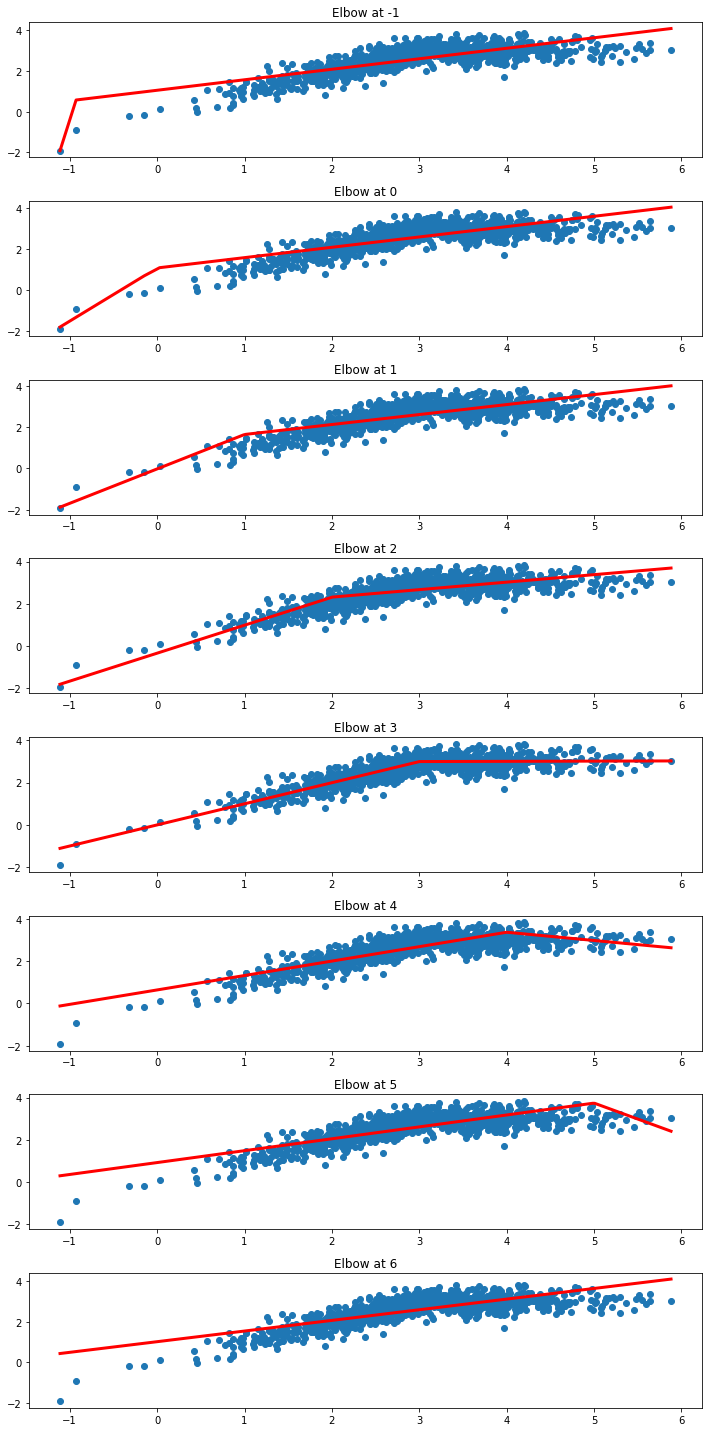

In [33]:
# Run over a mesh from -1 to 6 (inclusive) by 1
mesh = np.arange(-1, 7, 1)
fig, axs = plt.subplots(len(mesh), figsize=(10, 20))

for e in mesh:
    # Generate fit
    loop_model_fit = sim_elbow_point(e)
    
    # Plot scatterplot and line fit
    axs[e + 1].set_title(f'Elbow at {e}')
    axs[e + 1].scatter(df2['x'], df2['y'])
    axs[e + 1].plot(sort_df(df2), loop_model_fit.predict(sort_df(df2)), color='red', linewidth=3)

plt.tight_layout()
plt.show()

Notice how in each case the slope abruptly changes at the "elbow" point.  In generally, if you want to introduce a change in slope and/or behavior after some value of x (mathematically you might call this a non-differentiable point), we you can use the following formula:

```
y_est = Intercept + B_1 * x + B_2 * (x - point) * (x > point)
```

However, seeing things like this in your data should be ringing alarm bells in your head!

- Sometimes it points to something important that underlies an important mechanism in your data that should be investigated.  One way I've seen this in the real world is by working with a retailer to understand what factors drive sales process, where the average number of employees in the store helped generate more average sales up to a point (turned out to be 5 average employees, which was enough to hold 1 register and the 4 main areas of their stores) and after that point there was no incremental gain in average sales. 
- Sometimes it's caused by poor data collection practices.  I've also seen this caused due to truncation that a client wasn't aware of (e.g. if any value over Z is reported, use Z).

Strange things happen sometimes, and visualizing your data is an easy to way to notice these things.